## LOGISTIC REGRESSION ON WA_Fn-UseC_-Telco-Customer-Churn(DATASET FROM KAGGLE)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/user/Desktop/masturah/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
# the customerID is not needed, hence it will be remove and the total charges is supposed to be float but object. it will bw change too
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df=df.drop('customerID', axis = 1)

In [6]:
df.shape

(7043, 20)

In [7]:
# the total charges is object which is supposed to be float
#pd.to_numeric(df.TotalCharges) -- this is the code but some are having space in them
pd.to_numeric(df.TotalCharges, errors ='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
data = df[df.TotalCharges != ' ']

In [9]:
data.shape

(7032, 20)

In [10]:
#total charges is still object It is needed to be converted to float
data.TotalCharges=pd.to_numeric(data.TotalCharges)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
#the TotalCharges data type has been change
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## DATA VISUALIZATION

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customers')

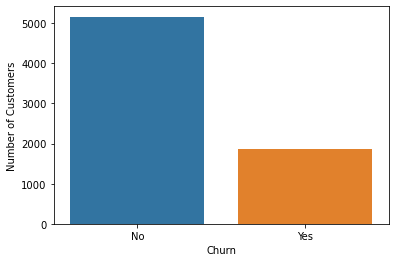

In [12]:
sns.countplot('Churn', data = data)
plt.ylabel("Number of Customers")

INSIGHT

The churning rate is approximately 27%.

In [13]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0, 0.5, 'Number of customers')

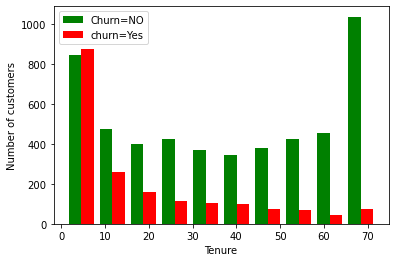

In [14]:
#the tenure of the customer that are not leaving
tenure_churn_no = data[data.Churn == 'No'].tenure
tenure_churn_yes = data[data.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color = ['green', 'red'], label = ['Churn=NO', 'churn=Yes'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')

# Insight
### it is obvious that those that are with the company for long are not leaving it is those that are just joining the company that are leaving 

Text(0, 0.5, 'Number of customers')

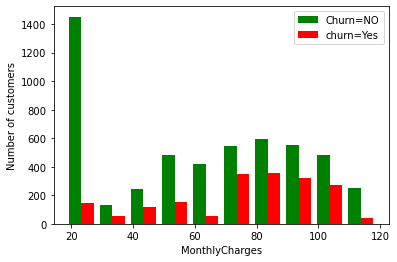

In [15]:
#the MonthlyCharges of the customer by churning rate
MonthlyCharges_churn_no = data[data.Churn == 'No'].MonthlyCharges
MonthlyCharges_yes = data[data.Churn == 'Yes'].MonthlyCharges

plt.hist([MonthlyCharges_churn_no, MonthlyCharges_yes], color = ['green', 'red'], label = ['Churn=NO', 'churn=Yes'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of customers')

## INSIGHT
#### The cutomers with high charges tend to churn more than those with low rate

Text(0, 0.5, 'Number of customers')

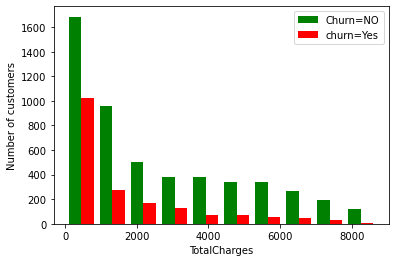

In [16]:
#the MonthlyCharges of the customer by churning rate
TotalCharges_churn_no = data[data.Churn == 'No'].TotalCharges
TotalCharges_yes = data[data.Churn == 'Yes'].TotalCharges

plt.hist([TotalCharges_churn_no, TotalCharges_yes], color = ['green', 'red'], label = ['Churn=NO', 'churn=Yes'])
plt.legend()
plt.xlabel('TotalCharges')
plt.ylabel('Number of customers')

## INSIGHT

#### The churning rate decreases with the Totalcharges. the Lesser the charges the smaller the churning rate.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customers')

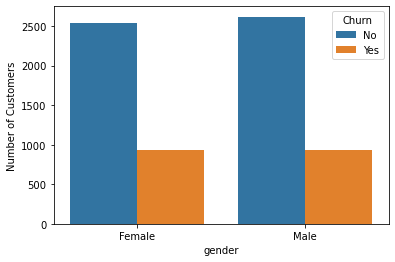

In [17]:
sns.countplot('gender', hue='Churn',data = data)
plt.ylabel("Number of Customers")

## INSIGHT
#### The churning rate is not gender bias. both male and female churn the bank

In [18]:
churn = pd.get_dummies(data.Churn, drop_first = True)

In [19]:
df1 = data[[ 'tenure', 'MonthlyCharges', 'TotalCharges']]
df2 = pd.concat([df1,churn], axis = 1)

<AxesSubplot:>

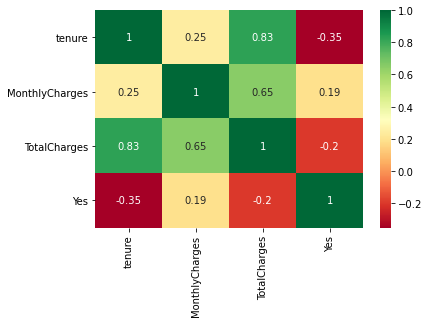

In [20]:
sns.heatmap(df2.corr(), annot = True, cmap='RdYlGn')

## INTERPRETATION
#### The above chart show the correlation between Tenure, MonthlyCharges, TotalCharges and Churning rate


The higher the tenure the lower the churning rate
The longer you stay with the bank the higher the monthlycharges hence The totalcharges.

## CONCLUSION

### Customers with high tenure pay more charges and churn less why new customers i.e. customers with low tenure pay lesser charges and churn most

# DATA CLEANING

### FOR THE MODEL PURPOSE

In [21]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# changing all other data types to int by getting dummies for them
for col in data:
    if data[col].dtype == 'object':
        print(f'{col} = {data[col].unique()}')

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [23]:
data.replace('No phone service', 'No', inplace = True)
data.replace('No internet service', 'No', inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
data.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5732,Male,1,No,No,19,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,87.30,1637.30,No
853,Female,0,No,No,5,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,64.35,352.65,No
3669,Male,0,No,No,44,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,111.50,4915.15,No
946,Male,0,Yes,Yes,4,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.50,77.60,No


In [25]:
data1 = pd.get_dummies(data=data, columns=['gender', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', "OnlineSecurity",
                       'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)

In [26]:
data1.sample(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
5832,0,20,70.45,1470.95,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1
4546,0,12,84.50,916.90,0,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,1
3032,0,17,19.45,369.05,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
6367,0,70,48.40,3442.80,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [27]:
#ALL ARE OKAY NOW 
data1.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit

In [28]:
X = data1.drop('Churn_Yes', axis = 1)
y = data1.Churn_Yes
X.shape,y.shape

((7032, 23), (7032,))

In [29]:
# From the churn rate visualization above we observe an imbalance in the dataset. the No is almost 3 times the Yes
data1.Churn_Yes.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE()
X, y = sm.fit_resample(X,y)

In [32]:
#The Imbalance has been taking care
X.shape, y.shape

((10326, 23), (10326,))

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 42)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7744, 23), (2582, 23), (7744,), (2582,))

### LOGISTIC MODEL

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
##ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.813710302091402

In [37]:
y_pred[:10]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1291
           1       0.80      0.84      0.82      1291

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582



Text(33.0, 0.5, 'Actual')

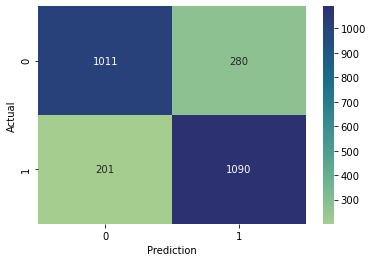

In [39]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'crest')
plt.xlabel('Prediction')
plt.ylabel('Actual')

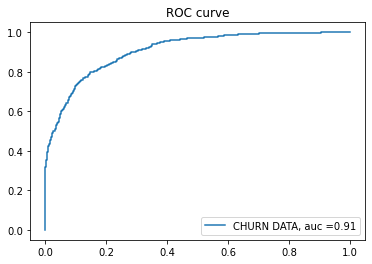

In [40]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test, y_pred_proba)
auc = round(auc,2)
plt.plot(fpr,tpr, label = 'CHURN DATA, auc ='+str(auc))
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

In [43]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
2,MonthlyCharges,0.067593
19,PaperlessBilling_Yes,0.064684
3,TotalCharges,0.000628
5,Partner_Yes,-0.010304
1,tenure,-0.071531
10,InternetService_No,-0.191445
4,gender_Male,-0.323676
16,StreamingMovies_Yes,-0.443726
0,SeniorCitizen,-0.445765
15,StreamingTV_Yes,-0.530095
